Łukasz Blachnicki

Formula 11

In [8]:
from typing import Tuple, List

Point = Tuple[float, float]

points: List[Point] = [
    (1, 10),
    (2, 18),
    (3, 22),
    (4, 27),
    (5, 36),
    (6, 49),
    (7, 56),
    (8, 64),
    (9, 70),
    (10, 78),
]

# returns parameters p0, p1 of a linear function
def least_squares_approximation(points: List[Point]) -> Tuple[float, float]:
    N = sum(p[0] for p in points)
    L = sum(p[1] for p in points)
    N_square_sum = sum(p[0]**2 for p in points)
    N_L_sum = sum(p[0]*p[1] for p in points)

    w = len(points) * N_square_sum - N * N
    w1 = L * N_square_sum - N_L_sum * N
    w2 = len(points) * N_L_sum - N * L

    p0 = w1/w
    p1 = w2/w

    return p0, p1

least_squares_approximation(points)

(0.13333333333333333, 7.793939393939394)

In [2]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_linear_approximation_points(self):
        known_points: List[Point] = [
            (1, 10),
            (2, 18),
            (3, 22),
            (4, 27),
            (5, 36),
            (6, 49),
            (7, 56),
            (8, 64),
            (9, 70),
            (10, 78),
        ]

        actual = least_squares_approximation(known_points)

        self.assertAlmostEqual(
            actual[0],
            0.133,
            places=3
        )
        self.assertAlmostEqual(
            actual[1],
            7.794,
            places=3
        )

unittest.main(argv=[''], verbosity=2, exit=False)

test_linear_approximation_points (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


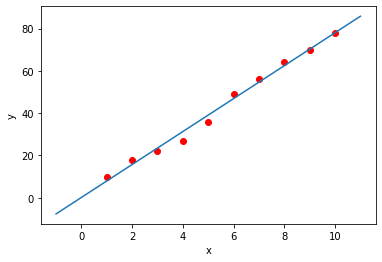

In [10]:
import matplotlib.pyplot as plt
import numpy

known_points: List[Point] = [
    (1, 10),
    (2, 18),
    (3, 22),
    (4, 27),
    (5, 36),
    (6, 49),
    (7, 56),
    (8, 64),
    (9, 70),
    (10, 78)
]


def graph(x: float, a: float, b: float):
    return a * x + b

params = least_squares_approximation(known_points)

x_draw = [(x, graph(x, params[1], params[0])) for x in numpy.linspace(-1.0, 11.0, num=50)]
plt.plot(*zip(*x_draw)) # interpolated curve

plt.scatter(*zip(*known_points), c='red') # original points
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Formula 13

# todo calculations

In [15]:
import math

known_points: List[Point] = [
    (1, 0.03),
    (2, 0.3),
    (3, 0.45),
    (4, 0.6),
    (5, 0.7),
    (6, 0.8),
]

# returns parameters a, b of y= a * lnx + b
def ln_least_squares_1(points: List[Point]) -> Tuple[float, float]:
    lnX_sum = sum(math.log(p[0]) for p in points)
    Y_sum = sum(p[1] for p in points)
    YlnX_sum = sum(p[1] * math.log(p[0]) for p in points)
    lnXsquared_sum = sum(math.log(p[0])**2 for p in points)
    n = len(points)

    a = (Y_sum * lnX_sum + n * YlnX_sum) / (lnX_sum * lnX_sum + n * lnXsquared_sum)
    b = (a * lnXsquared_sum - YlnX_sum) / lnX_sum

    print(lnX_sum, Y_sum, YlnX_sum, lnXsquared_sum, n)

    return a, b

ln_least_squares_1(known_points)

6.579251212010101 2.88 4.094110414826882 9.409906419952225 6


(0.43623716750370534, 0.0016476811628989268)

In [20]:
class TestNotebook(unittest.TestCase):

    def test_ln_least_squares_1(self):
        known_points: List[Point] = [
            (1, 0.03),
            (2, 0.3),
            (3, 0.45),
            (4, 0.6),
            (5, 0.7),
            (6, 0.8),
        ]

        actual = ln_least_squares_1(known_points)

        self.assertAlmostEqual(
            actual[0],
            0.436,
            places=3
        )
        self.assertAlmostEqual(
            actual[1],
            0.0016,
            places=3
        )

unittest.main(argv=[''], verbosity=2, exit=False)

test_ln_least_squares_1 (__main__.TestNotebook) ... 

6.579251212010101 2.88 4.094110414826882 9.409906419952225 6


ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


6.579251212010101 2.88 4.094110414826882 9.409906419952225 6


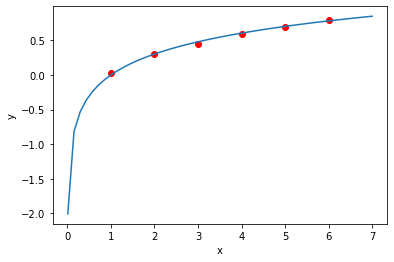

In [25]:
known_points: List[Point] = [
    (1, 0.03),
    (2, 0.3),
    (3, 0.45),
    (4, 0.6),
    (5, 0.7),
    (6, 0.8),
]


def graph(x: float, a: float, b: float):
    return a * math.log(x) + b

params = ln_least_squares_1(known_points)

x_draw = [(x, graph(x, params[0], params[1])) for x in numpy.linspace(0.01, 7.0, num=50)]
plt.plot(*zip(*x_draw)) # interpolated curve

plt.scatter(*zip(*known_points), c='red') # original points
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# jupyter nbconvert --execute --to pdf notebook.ipynb